# House Price Prediction  

## 1 Loading libraries and Dataset

In [25]:
import numpy as np 
import pandas as pd
import keras
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

In [4]:
# Uploading and labeling the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## 2 Describing the shape, mean, max and min of the dataset

In [8]:
print(data.describe())
print('\n \n Shape')
print(np.shape(data))


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## 2 Find the Correlation between MEDV and other characters 

<AxesSubplot:>

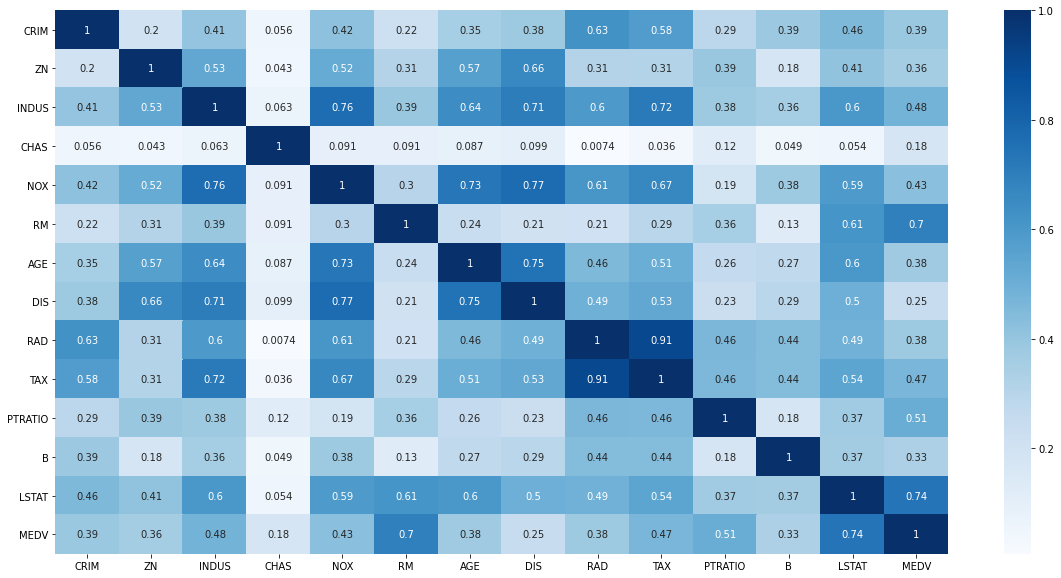

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True, cbar=True, cmap='Blues')

### LSTAT, PTRATIO, RM has correlation more than 0.5 with MEDV

In [29]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire 
x = data.iloc[:, 0:13]
y = data['MEDV']
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
l_model = lm.fit(x_train,y_train)
pred_y = lm.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predict": pred_y}).head()

,Actual,Predict
226,37.6,37.467236
292,27.9,31.391547
90,22.6,27.120196
373,13.8,6.468433
273,35.2,33.629667


In [51]:
data = data[~(data['MEDV'] >= 50.0)]
np.shape(data)

(490, 14)

## 3 Let's scale the columns before plotting them against MEDV

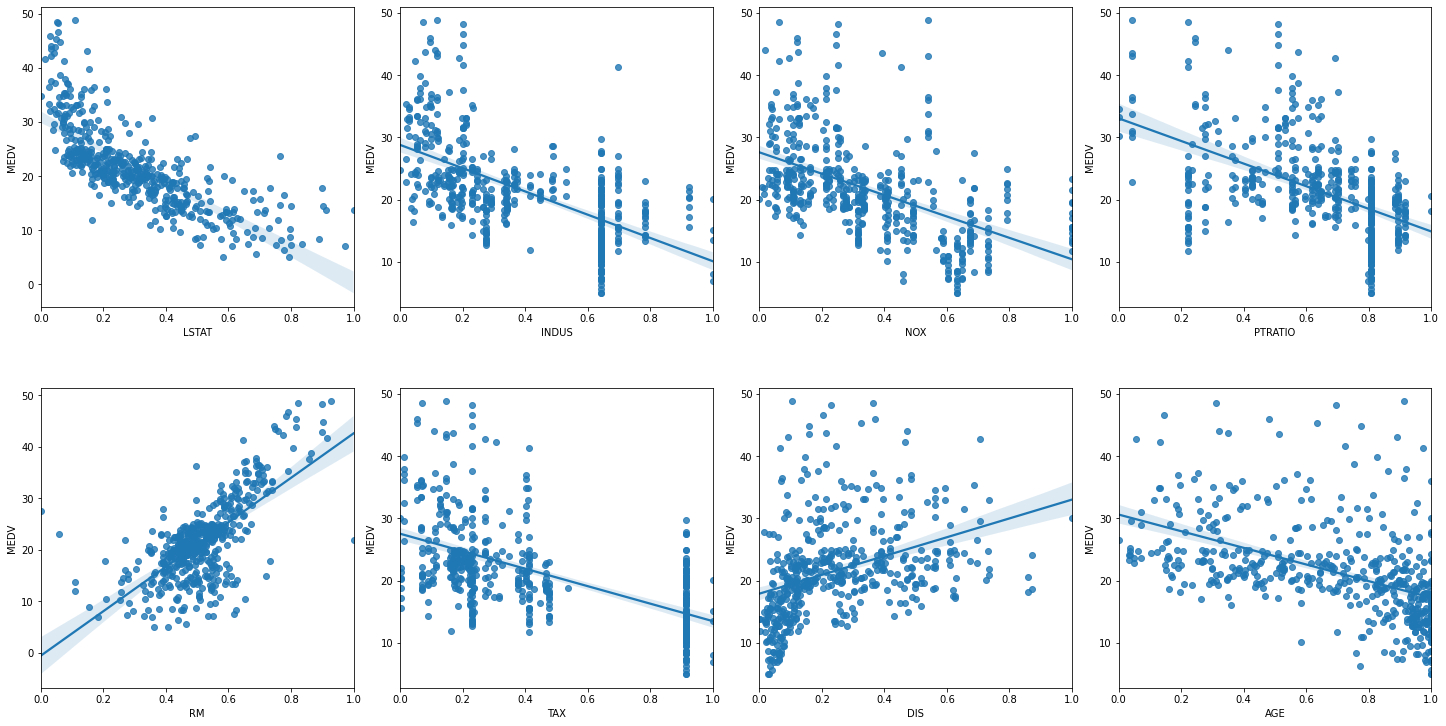

In [53]:
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [54]:
X_train = x.head(400)
Y_train = y.head(400)

X_test = x.tail(90)
Y_test = y.tail(90)

batch_size = 32
epochs = 800
inp_shape = X_train.shape[1]

In [58]:
mlp_model = Sequential([
    Dense(50, activation='relu', input_shape=(inp_shape,)),
    Dense(1)
])

mlp_model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = mlp_model.fit(x, y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

_mse: 17.7353
Epoch 653/800
14/14 [==============================] - 0s 7ms/step - loss: 9.5824 - mse: 9.5824 - val_loss: 17.8783 - val_mse: 17.8783
Epoch 654/800
14/14 [==============================] - 0s 7ms/step - loss: 9.5937 - mse: 9.5937 - val_loss: 17.5985 - val_mse: 17.5985
Epoch 655/800
14/14 [==============================] - 0s 5ms/step - loss: 9.5897 - mse: 9.5897 - val_loss: 18.1754 - val_mse: 18.1754
Epoch 656/800
14/14 [==============================] - 0s 7ms/step - loss: 9.6006 - mse: 9.6006 - val_loss: 17.9366 - val_mse: 17.9366
Epoch 657/800
14/14 [==============================] - 0s 9ms/step - loss: 9.5714 - mse: 9.5714 - val_loss: 17.8815 - val_mse: 17.8815
Epoch 658/800
14/14 [==============================] - 0s 6ms/step - loss: 9.5688 - mse: 9.5688 - val_loss: 17.2512 - val_mse: 17.2512
Epoch 659/800
14/14 [==============================] - 0s 6ms/step - loss: 9.5637 - mse: 9.5637 - val_loss: 17.8956 - val_mse: 17.8956
Epoch 660/800
14/14 [====================

In [59]:
mlp_model.evaluate(X_test, Y_test)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

3/3 [==============================] - 0s 3ms/step - loss: 12.6178 - mse: 12.6178


(0.0, 100.0)

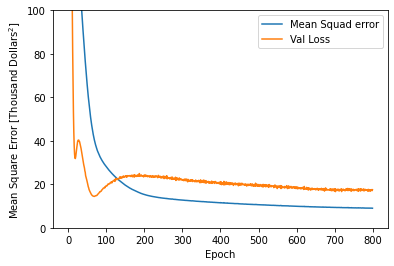

In [60]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Mean Squad error')
plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
plt.legend()
plt.ylim([0,100])

In [61]:
train_mean = np.mean(x, axis=0)
train_std = np.std(x, axis=0)
train_features = (x - train_mean) / train_std

In [62]:
train_features

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,-1.122679,-1.291856,-0.139895,-1.527280,0.505040,-0.667101,0.121208,-0.109432
1,-0.534772,-0.593329,-0.731821,-0.341504,0.269017,-0.988734,0.537330,0.377488
2,-1.256937,-0.593329,-0.731821,-0.341504,1.439934,-0.988734,0.537330,-0.255152
3,-1.410980,-1.310933,-0.826186,0.085376,1.153335,-1.107857,1.056878,-0.798939
4,-1.073216,-1.310933,-0.826186,0.085376,1.381694,-1.107857,1.056878,-0.500390
...,...,...,...,...,...,...,...,...
485,-0.459871,0.119873,0.160357,1.176290,0.532627,-0.804093,-0.643288,0.029180
486,-0.543252,0.119873,0.160357,1.176290,-0.192299,-0.804093,-0.733952,0.299297
487,-1.029406,0.119873,0.160357,1.176290,1.119618,-0.804093,-0.790883,0.807542
488,-0.910694,0.119873,0.160357,1.176290,0.840682,-0.804093,-0.685845,0.747121
